# KNN (k-Nearest Neighbors)

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

<img src="images/fig-knn-1.png" />

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. 


# Working of KNN Algorithm

K-nearest neighbors (KNN) algorithm uses **feature similarity** to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

* we need to choose the value of K i.e. the nearest data points. K can be any integer.
* For each point in the test data do the following −

    * Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

    * Now, based on the distance value, sort them in ascending order.

    * Next, it will choose the top K rows from the sorted array.

    * Now, it will assign a class to the test point based on most frequent class of these rows.
    
Example
The following is an example to understand the concept of K and working of KNN algorithm −

Suppose we have a dataset which can be plotted as follows −

<img src="images/fig-knn-2.jpg" />

Now, we need to classify new data point with black dot (at point 60,60) into blue or red class. We are assuming K = 3 i.e. it would find three nearest data points. It is shown in the next diagram −

<img src="images/fig-knn-4.jpg" />

We can see in the above diagram the three nearest neighbors of the data point with black dot. Among those three, two of them lies in Red class hence the black dot will also be assigned in red class.

# Choosing the right value for K

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

### What does the ”K” in KNN stand for?

$K$ in KNN stands for the number of cases that are considered to be "nearest" when you convert the cases as points in a euclidean space. 

That means, if we consider k=3, and when a new point has to be assigned a class, it will be on the basis of the classes of the 3 nearest points that surround the new point as per the euclidean distance.

### Here are some things to keep in mind:

* 1. As we decrease the value of K to 1, our predictions become less stable. 
        Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one blue , but the blue is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is blue.

* 2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

* 3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

# KNN throug Python

In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# This is just a dummy data
df = pd.read_csv('datasets/KNN_Project_Data')
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Standardize the Variables

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [6]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [11]:
predictions = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# compute and print accuracy score
print('Accuracy of the model::{0:0.4f}'.format(accuracy_score(y_test, predictions)))

[[114  41]
 [ 45 100]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       155
           1       0.71      0.69      0.70       145

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Accuracy of the model::0.7133


## Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [14]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

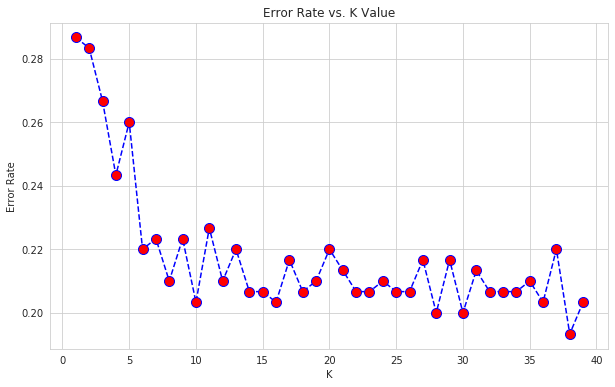

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [32]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

# compute and print accuracy score
print('Accuracy of the model::{0:0.4f}'.format(accuracy_score(y_test, pred)))

WITH K=38


[[118  37]
 [ 21 124]]


              precision    recall  f1-score   support

           0       0.85      0.76      0.80       155
           1       0.77      0.86      0.81       145

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

Accuracy of the model::0.8067


# Refrence:
* https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm
* https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761